In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
from matplotlib.pyplot import MultipleLocator
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
d1 = pd.read_excel('/Users/yhj/Desktop/内生环境.xlsx', index_col = 0, header = 0, sheet_name = "Sheet1")

In [3]:
bond = pd.read_excel('/Users/yhj/Desktop/data2.xlsx', sheet_name = "Base", index_col = 0)

In [4]:
bond = bond/100

In [5]:
data = pd.merge(d1, bond, how = 'left', left_on = d1.index, right_on = bond.index)
data.index = data['key_0']
data.drop(['key_0'],axis = 1, inplace = True)

In [6]:
data.dropna(inplace = True)

In [7]:
data['EP-Bond'] = -(1/data['市盈率'] - data['10年国债收益率'])
data.drop(['10年国债收益率'], axis = 1, inplace = True)

df = data.drop(['收盘价'], axis = 1)

df

市盈率     市净率     换手率   EP-Bond
key_0                                        
2005-04-08  15.6050  2.0622  1.3953 -0.023179
2005-04-11  15.4991  2.0377  1.5062 -0.022920
2005-04-12  15.1283  2.0008  0.9665 -0.025872
2005-04-13  15.5899  2.0475  1.5175 -0.023492
2005-04-14  15.4431  2.0256  1.2224 -0.024467
...             ...     ...     ...       ...
2021-07-06  14.4379  1.7131  0.5134 -0.038408
2021-07-07  14.5488  1.7221  0.5422 -0.038180
2021-07-08  14.3906  1.7040  0.6344 -0.039660
2021-07-09  14.3330  1.6970  0.5860 -0.039664
2021-07-12  14.4451  1.7124  0.7522 -0.039797

[3954 rows x 4 columns]

In [8]:
def quantile(col, y, v):
        
        y_5 = list(df[col][df.index.year == y-5].values)
        
        y_4 = list(df[col][df.index.year == y-4].values)
        
        y_3 = list(df[col][df.index.year == y-3].values)
        
        y_2 = list(df[col][df.index.year == y-2].values)
        
        y_1 = list(df[col][df.index.year == y-1].values)
        
        now = [y_5, y_4, y_3, y_2, y_1]
        
        q = 0
        
        for l in now:
            
            l.append(v)
            
            l.sort()
            
            for i in np.arange(len(l)):
                
                if l[i] == v:
                    
                    q = q + i/(len(l)-1)
        
        quantile = q/5
        
        return quantile

In [9]:
def year_df(yea) :
    
#     i = 0
    
    df_y = pd.DataFrame(columns = df.columns, index = df[df.index.year == yea].index)
    
#     arr = df[df.index.year == yea].values.transpose()
    
    for col in df.columns:
        
        L = []
        
        for v in df[col][df.index.year == yea].values:
            
            L.append(quantile(col,yea,v))
            
#         arr[i] = L_2011
        arr = np.array(L)
            
#         i += 1
        
        df_y.loc[:, col] = arr
    
    
    
    return df_y 

In [10]:
df_2011 = year_df(2011)
df_2012 = year_df(2012)
df_2013 = year_df(2013)
df_2014 = year_df(2014)
df_2015 = year_df(2015)
df_2016 = year_df(2016)
df_2017 = year_df(2017)
df_2018 = year_df(2018)
df_2019 = year_df(2019)
df_2020 = year_df(2020)
df_2021 = year_df(2021)

In [11]:
def ave(f):
    
    f['EP-Bond'] = -f['EP-Bond']
    
    f['Average'] = f.mean(axis = 1)
    
    f.drop(['市盈率','市净率','换手率','EP-Bond'],axis = 1, inplace = True)
    
    return f

In [12]:
final_2011 = ave(df_2011)
final_2012 = ave(df_2012)
final_2013 = ave(df_2013)
final_2014 = ave(df_2014)
final_2015 = ave(df_2015)
final_2016 = ave(df_2016)
final_2017 = ave(df_2017)
final_2018 = ave(df_2018)
final_2019 = ave(df_2019)
final_2020 = ave(df_2020)
final_2021 = ave(df_2021)

In [13]:
final_total = pd.concat([final_2011,final_2012,final_2013,
                         final_2014,final_2015,final_2016,
                         final_2017,final_2018,final_2019,
                        final_2020,final_2021], axis = 0)

In [14]:
final = pd.merge(left = final_total, right = data['收盘价'],left_on = final_total.index, right_on = data.index, how = 'left')
final.index = final.key_0
final.drop(['key_0'], axis = 1, inplace = True)
final

Average        收盘价
key_0                          
2011-01-04  0.101937  3189.6820
2011-01-05  0.090184  3175.6620
2011-01-06  0.065434  3159.6430
2011-01-07  0.093884  3166.6240
2011-01-10  0.060275  3108.1870
...              ...        ...
2021-07-06  0.497418  5083.1043
2021-07-07  0.475523  5140.4899
2021-07-08  0.548512  5088.2566
2021-07-09  0.484961  5069.4361
2021-07-12  0.520685  5132.7088

[2558 rows x 2 columns]

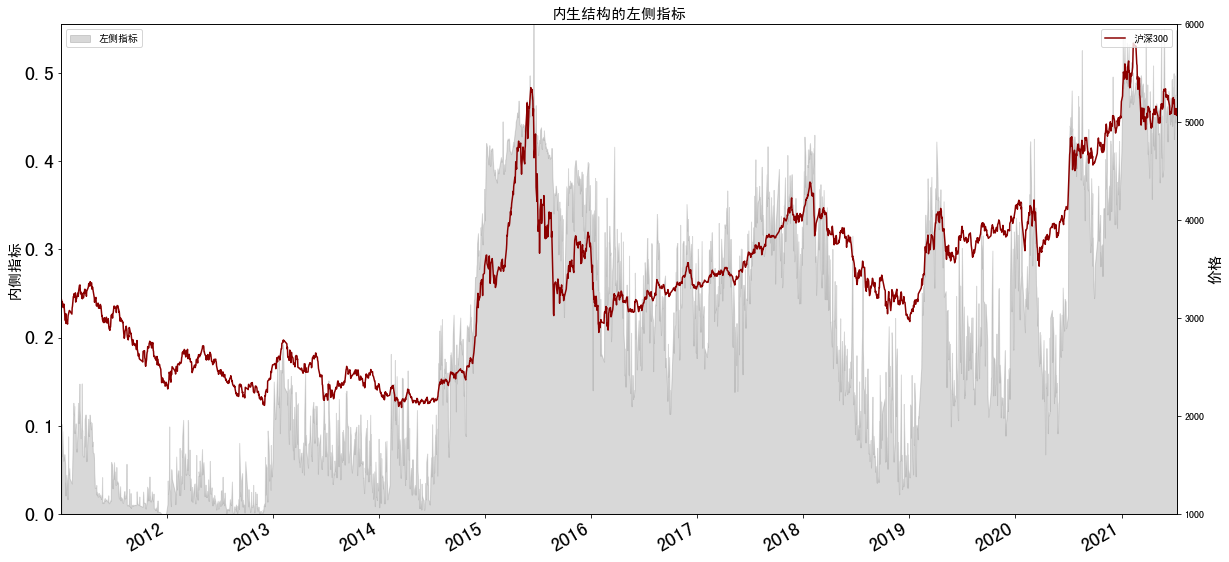

In [15]:
pp = PdfPages('first.pdf')

fig,ax1 = plt.subplots(figsize = (20,10))

plt.fill_between(final.index, 0, final.Average,color = 'gray',label="左侧指标", alpha = 0.3)



plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y")) 
plt.gcf().autofmt_xdate()
plt.tick_params(labelsize = 20)

plt.margins(x=0,y=0)

plt.ylabel('内侧指标',fontsize = 15)

plt.legend(loc = 'upper left')

ax2 = ax1.twinx()

plt.plot(final.index, final['收盘价'], color = 'darkred',label = '沪深300')

plt.ylabel('价格',fontsize = 15)

plt.xlabel("Date")

plt.legend(loc='upper right')

plt.ylim(1000,6000)

plt.margins(x=0,y=0)

plt.title("内生结构的左侧指标", fontsize = 15)

pp.savefig()

pp.close()